#### In betting, a spread line represents the predicted difference in score between two teams in a given event. It is also correlated with the "straight-up" moneyline price, which is either team to win outright. This quick study will attempt to find a true moneyline price for NBA sides based on the line against the spread.

We will look at spreads from -10 to 10.

Data was manually assembled from <link>www.killersports.com</link>.

Additionally, we can check out how efficient NBA spreads are.

In [23]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr
from statistics import stdev
import os

sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

In [166]:
lines = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
margins_neg = [(804,151,10.36), (1019, 224, 9.7), (1123, 306, 8.16), (1305, 452, 6.58), (1346, 547, 5.38),
          (1314, 692, 4.25), (1218, 778, 3.06), (1196, 893, 1.85), (972, 859, 1.05), (576, 584, .21)]

margins_pos = [(x[1],x[0],-x[2]) for x in margins_neg]
margins_pos.reverse()

In [167]:
margins_neg.extend(margins_pos)

In [168]:
margins = margins_neg

In [169]:
margins

[(804, 151, 10.36),
 (1019, 224, 9.7),
 (1123, 306, 8.16),
 (1305, 452, 6.58),
 (1346, 547, 5.38),
 (1314, 692, 4.25),
 (1218, 778, 3.06),
 (1196, 893, 1.85),
 (972, 859, 1.05),
 (576, 584, 0.21),
 (584, 576, -0.21),
 (859, 972, -1.05),
 (893, 1196, -1.85),
 (778, 1218, -3.06),
 (692, 1314, -4.25),
 (547, 1346, -5.38),
 (452, 1305, -6.58),
 (306, 1123, -8.16),
 (224, 1019, -9.7),
 (151, 804, -10.36)]

In [170]:
wins = []
losses = []
totals = []
avg_margins = []

for i, line in enumerate(lines):
    wins.append(margins[i][0])
    losses.append(margins[i][1])
    avg_margins.append(margins[i][2])

In [171]:
margins = pd.DataFrame({'line':lines,'wins':wins,'losses':losses,'avg_margins':avg_margins})

In [172]:
margins.head()

,line,wins,losses,avg_margins
0,-10,804,151,10.36
1,-9,1019,224,9.70
2,-8,1123,306,8.16
3,-7,1305,452,6.58
4,-6,1346,547,5.38


In [173]:
margins['win_pct'] = margins['wins']/(margins['wins']+margins['losses'])

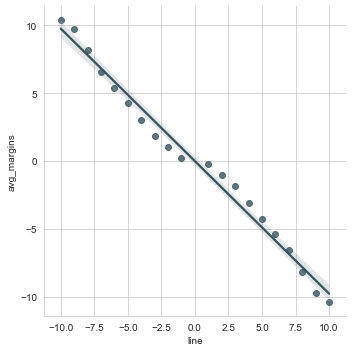

In [174]:
sns.lmplot(x='line', y='avg_margins', data=margins)

In [179]:
margins['fair_ml_price'] = round(1/margins['win_pct'],2)

In [181]:
def dec_to_am(price):
    if price>=2.0:
        price = (price-1) * 100
    else:
        price = -100/(price-1)
    return price

In [183]:
margins['fair_am_price'] = margins['fair_ml_price'].apply(dec_to_am)

In [185]:
pearsonr(margins['line'], margins['avg_margins'])

(-0.9928761519159817, 4.373431896519981e-18)

In [187]:
margins

,line,wins,losses,avg_margins,win_pct,fair_ml_price,fair_am_price
0,-10,804,151,10.36,0.841885,1.19,-526.315789
1,-9,1019,224,9.70,0.819791,1.22,-454.545455
2,-8,1123,306,8.16,0.785864,1.27,-370.370370
3,-7,1305,452,6.58,0.742743,1.35,-285.714286
4,-6,1346,547,5.38,0.711041,1.41,-243.902439
5,-5,1314,692,4.25,0.655035,1.53,-188.679245
6,-4,1218,778,3.06,0.610220,1.64,-156.250000
7,-3,1196,893,1.85,0.572523,1.75,-133.333333
8,-2,972,859,1.05,0.530857,1.88,-113.636364
9,-1,576,584,0.21,0.496552,2.01,101.000000
